In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.python.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [5]:
#df=pd.read_csv('https://raw.githubusercontent.com/bbrandom91/KC_Housing/master/kc_house_data.csv')
#df.to_csv('kc_house_data.csv')
df=pd.read_csv('candy-data_csv.csv')
print(df.columns)

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')


In [6]:
df=df.sort_values(by='winpercent')
candy=np.array(df)

competitorname=candy[:,0]
chocolate=candy[:,1]
fruity=candy[:,2]
caramel=candy[:,3]
peanutyalmondy=candy[:,4]
nougat=candy[:,4]
crispedricewafer=candy[:,5]
hard=candy[:,7]
bar=candy[:,8]
pluribus=candy[:,9]
sugarpercent=candy[:,10]
pricepercent=candy[:,11]
winpercent=candy[:,12]

print(df[df['competitorname']=='whoppers'].head())

   competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
84       whoppers          1       0        0               0       0   

    crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
84                 1     0    0         1         0.872         0.848   

    winpercent  
84   49.524113  


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

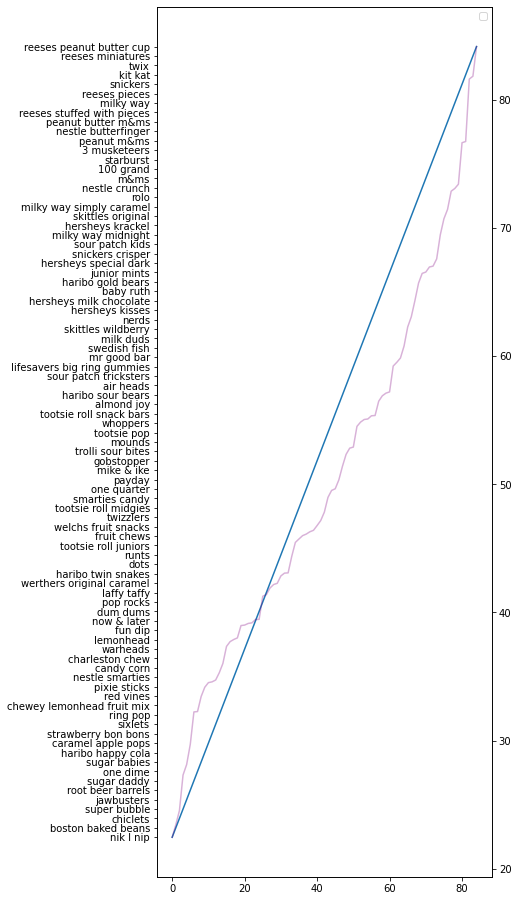

In [7]:
plt.clf()
fig,ax=plt.subplots(figsize=(6,16))
ax.plot(competitorname)
ax2=ax.twinx()
ax2.plot(winpercent,color='purple', alpha=.3)
plt.legend()
plt.show()

In [8]:
def linear_regression(intercept, slope, features=sqft):
    return intercept+features*slope

def loss_function(intercept, slope, targets=price, features=sqft):
    # Compute the predicted values
    predictions = linear_regression(intercept, slope)
    
    # Return the mean absolute error loss
    return keras.losses.mae(targets, predictions)

NameError: name 'sqft' is not defined

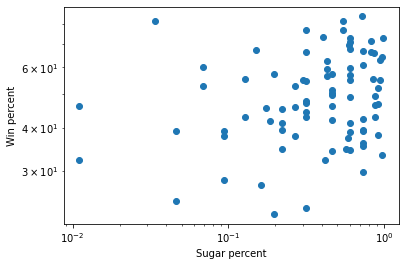

[]

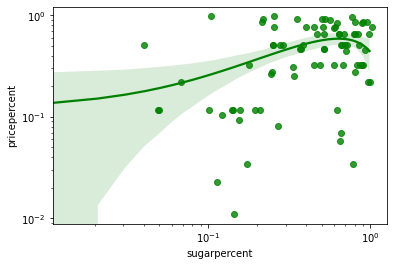

In [9]:
#slope=tf.Variable(0.1,np.float32)
#intercept=tf.Variable(0.1,np.float32)

#opt=tf.keras.optimizers.Adam()
#for j in range(1000):
#    opt.minimize(lambda: loss_function(intercept,slope),\
#    var_list=[intercept,slope])
#    print(loss_function(intercept,slope))
          
plt.scatter(sugarpercent,winpercent)
plt.xlabel('Sugar percent')
plt.ylabel('Win percent')
plt.loglog()
plt.show()

sns.regplot(x='sugarpercent',y='pricepercent', data=df,order=2,color='green',x_jitter=.1)
plt.loglog()

In [10]:
#https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
def prepare_inputs(X_train, X_test):
    ohe = OneHotEncoder()
    ohe.fit(X_train)
    X_train_enc = ohe.transform(X_train)
    X_test_enc = ohe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [11]:
COLUMNS=['competitorname','chocolate', 'fruity', 'caramel', 'peanutyalmondy','nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',  'pricepercent']

#COLUMNS=['sugarpercent','pricepercent']

TARGET='winpercent'
X=df[COLUMNS]
X['competitorname']=pd.Categorical(X['competitorname'])
competitor_labels=X['competitorname'].unique()
X['codes']=X.competitorname.cat.codes
X=X.drop('competitorname',axis=1)
y=df[TARGET]

scaler = StandardScaler()
scaler.fit(X)
data=scaler.transform(X)

X_train, X_test, y_train, y_test= train_test_split(data,y,test_size=0.3)

#X_train_enc,X_test_enc=prepare_inputs(X_train,X_test)


neuron_size=len(df[COLUMNS].columns)
#neuron_size=len(X_train_enc.columns)
data_len=len(df)
#print(housing)
tensor = tf.placeholder(tf.float32, shape=[data_len,neuron_size])

dense1 = keras.layers.Dense(neuron_size, activation='sigmoid')(tensor)

# Define a dense layer with 3 output nodes
dense2 = keras.layers.Dense(3,activation='sigmoid')(dense1)

# Define a dense layer with 1 output node
predictions = keras.layers.Dense(5,activation='sigmoid')(dense2)

# Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)

model = Sequential()

input_size=neuron_size
model.add(Dense(24*5,activation='relu', input_shape=(input_size,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))


model.compile('adam',loss='mae',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)
print(model.summary())
predictions=model.predict(X_test)



Instructions for updating:
Colocations handled automatically by placer.


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys



 shape of dense1:  (85, 12)

 shape of dense2:  (85, 3)

 shape of predictions:  (85, 5)
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
59/59 [==============================] - 0s 2ms/step - loss: 48.0262 - accuracy: 0.0000e+00
Epoch 2/100
59/59 [==============================] - 0s 51us/step - loss: 47.9395 - accuracy: 0.0000e+00
Epoch 3/100
59/59 [==============================] - 0s 51us/step - loss: 47.8499 - accuracy: 0.0000e+00
Epoch 4/100
59/59 [==============================] - 0s 34us/step - loss: 47.7596 - accuracy: 0.0000e+00
Epoch 5/100
59/59 [==============================] - 0s 68us/step - loss: 47.6645 - accuracy: 0.0000e+00
Epoch 6/100
59/59 [==============================] - 0s 51us/step - loss: 47.5629 - accuracy: 0.0000e+00
Epoch 7/100
59/59 [==============================] - 0s 51us/step - loss: 47.4506 - accuracy: 0.0000e+00
Epoch 8/100
59/59 [==============================] - 0s 51us/step - loss: 47.3317 - accuracy: 0.0000e+00
Epoch 9/100
59/59 [====

<Figure size 432x288 with 0 Axes>

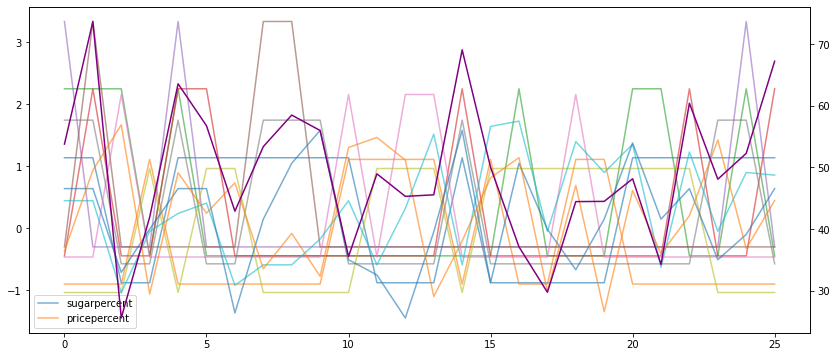

purple is predicted win percent and right legend


In [12]:
plt.clf()
fig,ax=plt.subplots(figsize=(14,6))
ax.plot(X_test, alpha=.6)
#plt.legend(['chocolate', 'fruity', 'caramel', 'peanutyalmondy','nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent','pricepercent'])
plt.legend(['sugarpercent','pricepercent'])
ax2=ax.twinx()
ax2.plot(predictions,color='purple')
plt.show()

print('purple is predicted win percent and right legend')

In [58]:
sugarpercent_def=tf.feature_column.numeric_column("sugarpercent")
pricepercent_def=tf.feature_column.numeric_column("pricepercent")
#rooms_def=tf.feature_column.categorical_column_with_vocabulary_list("rooms",["1","2","3","4","5"])

feature_list=[sugarpercent_def,pricepercent_def]


#'chocolate', 'fruity', 'caramel', 'peanutyalmondy',       
#'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
#'pricepercent'        
#print(competitorname)
features={
            'competitorname':np.array(competitorname),
            'chocolate':np.array(chocolate),
            'caramel':np.array(caramel),
            'peanutyalmondy':np.array(peanutyalmondy),
            'nougat':np.array(nougat),
            'crispedricewafer':np.array(crispedricewafer),
            'fruity':np.array(fruity),
            'caramel':np.array(caramel),
            'hard':np.array(hard),
            'bar':np.array(bar),
            'pluribus':np.array(pluribus),
            'sugarpercent':np.array(sugarpercent),
            'pricepercent':np.array(pricepercent)
         }

LABELS=np.array(winpercent)

NUMERIC=[ 'chocolate',
            'caramel',
            'peanutyalmondy',
            'nougat',
            'crispedricewafer',
            'fruity',
            'caramel',
            'hard',
            'bar',
        ]
scaler = StandardScaler()
data=pd.DataFrame(features)
scaler.fit(data[NUMERIC])

data=scaler.transform(data[NUMERIC])

X=data
y=LABELS
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

model=RandomForestRegressor(n_estimators=50, random_state=1111)

model.fit(X_train, y_train)

predictions=model.predict(X_test)

score=mae(y_true=y_test, y_pred=predictions)
print("MAE: {0:.2f}".format(score))
score=mse(y_test,predictions)
print("MSE: {0:.2f}".format(score))
print("MSE the outliers will have more of an impact on the model")

for i, item in enumerate(model.feature_importances_):
    print("{0:s} : {1:2f}".format(NUMERIC[i],item))
    


MAE: 8.78
MSE: 100.09
MSE the outliers will have more of an impact on the model
chocolate : 0.485208
caramel : 0.044733
peanutyalmondy : 0.088065
nougat : 0.107158
crispedricewafer : 0.049732
fruity : 0.035084
caramel : 0.034721
hard : 0.012264
bar : 0.143035


ValueError: Classification metrics can't handle a mix of unknown and continuous targets

In [38]:
def auc(variables, target, basetable):
    X = basetable[variables]
    y= basetable[target]

    logreg=LogisticRegression(max_iter=2000)
    logreg.fit(X,y.values.ravel())
    predictions=logreg.predict_proba(X)[:,1]
    auc=roc_auc_score(y, predictions)
    return auc

def next_best(current_variables, candidate_variables, target, basetable):
    best_auc=-1
    best_variable=None
    for v in candidate_variables:
        auc_v= auc(current_variables+[v],target, basetable)
        if auc_v >= best_auc:
            best_auc=auc_v
            best_variable=v
    return (best_variable,best_auc)

['fruity', 'winpercent', 'bar', 'sugarpercent', 'hard', 'caramel', 'caramel', 'crispedricewafer', 'nougat', 'peanutyalmondy', 'pricepercent', 'pluribus']


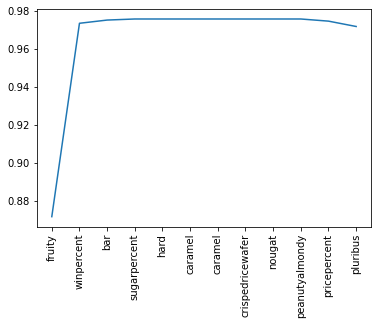

In [39]:
candidate_variables=['winpercent','caramel',
            'peanutyalmondy',
            'nougat',
            'crispedricewafer',
            'fruity',
            'caramel',
            'hard',
            'bar',
            'pluribus',
            'sugarpercent',
            'pricepercent']
current_variables=[]
auc_scores=[]
target=['chocolate']
max_number_variables=len(candidate_variables)

number_iterations=min(max_number_variables, len(candidate_variables))

for i in range(0,number_iterations):
    next_variable,auc_variable= next_best(current_variables, candidate_variables, target, df)
    current_variables=current_variables+[next_variable]
    auc_scores=auc_scores+[auc_variable]
    candidate_variables.remove(next_variable)

print(current_variables)
x=np.array(range(0,len(auc_scores)))
y = np.array(auc_scores)
plt.xticks(x, current_variables, rotation = 90)
plt.plot(x,y)
plt.show()